<div style="text-align: center; background-color: purple; padding: 15px; color: white; font-size: 30px;">
  <strong>Bank_Statement_Analysis</strong>
</div>



  
  <div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    IMPORT LIBRARARIES
  </div>



In [1]:
import pandas as pd
import numpy as np
import sklearn
import json
from pandas import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



  
  <div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
   IMPORT DATASET
  </div>



In [2]:
with open('C:\\Users\\HP\\Desktop\\project_py\\P1- BankStatements.json', 'r') as f:
    data=json.load(f)
    print(data)

{'Account': {'type': 'deposit', 'maskedAccNumber': 'XXXX6461', 'version': '1.1', 'linkedAccRef': '02f28b8d-d8a3-43d7-88c6-5fabb2e51541', 'xmlns': 'http://api.rebit.org.in/FISchema/deposit', 'xsi:schemaLocation': 'http://api.rebit.org.in/FISchema/deposit.xsd', 'xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance', 'Profile': {'Holders': {'type': 'SINGLE', 'Holder': {'name': 'Arun Shakya', 'dob': '2000-06-09', 'mobile': '8429489761', 'nominee': 'REGISTERED', 'address': '', 'email': 'NA', 'pan': 'FORM60', 'ckycCompliance': 'true'}}}, 'Summary': {'currentBalance': '761.41', 'currency': 'INR', 'exchgeRate': '1', 'balanceDateTime': '2024-05-30T03:05:12+05:30', 'type': 'SAVINGS', 'branch': 'AMETHI JADID, UP', 'ifscCode': 'BARB0AMEJAD', 'micrCode': '209012004', 'openingDate': '2020-11-24', 'currentODLimit': '0.00', 'drawingLimit': '0.00', 'status': 'ACTIVE', 'Pending': {'amount': '0.0'}}, 'Transactions': {'startDate': '2023-05-31', 'endDate': '2024-05-30', 'Transaction': [{'type': 'DEBIT', 



  
  <div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
   CREATE DATAFRAME
  </div>


 

In [3]:
df = pd.DataFrame(data['Account']['Transactions']['Transaction'])
df

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA
...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,2024-05-29T17:57:40+05:30,2024-05-29,S68913329,UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap,NA
981,CREDIT,OTHERS,938.0,961.41,2024-05-30T05:07:05+05:30,2024-05-30,S87517914,NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...,922020004688715
982,DEBIT,UPI,60.0,901.41,2024-05-30T09:58:24+05:30,2024-05-30,S94085910,UPI/451708846336/095823/UPI/Q936188905ybl/Paym,NA
983,DEBIT,UPI,130.0,771.41,2024-05-30T13:30:30+05:30,2024-05-30,S4676116,UPI/451747322898/133029/UPI/Q601737327ybl/Paym,NA


In [4]:
df['amount'] = df['amount'].astype(float)


In [5]:
def parse_transactions(json_data):
    df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
    return df

In [6]:
statement_data = parse_transactions(data)
statement_data

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27 09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28 09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26 10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07 17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA
...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,2024-05-29 17:57:40+05:30,2024-05-29,S68913329,UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap,NA
981,CREDIT,OTHERS,938.0,961.41,2024-05-30 05:07:05+05:30,2024-05-30,S87517914,NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...,922020004688715
982,DEBIT,UPI,60.0,901.41,2024-05-30 09:58:24+05:30,2024-05-30,S94085910,UPI/451708846336/095823/UPI/Q936188905ybl/Paym,NA
983,DEBIT,UPI,130.0,771.41,2024-05-30 13:30:30+05:30,2024-05-30,S4676116,UPI/451747322898/133029/UPI/Q601737327ybl/Paym,NA




  
  <div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
   check the all columns
  </div>


 
 

In [7]:
statement_data.columns

Index(['type', 'mode', 'amount', 'currentBalance', 'transactionTimestamp',
       'valueDate', 'txnId', 'narration', 'reference'],
      dtype='object')

 <div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
   CHECK THE ALL ROWS AND COLUMNS COUNTS
  </div>


In [8]:
statement_data.shape


(985, 9)

  <div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    DEAL WITH DUPLICATES
  </div>



In [9]:
duplicates = statement_data[statement_data.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)


No duplicates found.


  <div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    

TO CHECK THE TRANSACTION TIMESTAMP DATE AND VALUEDATE TRANSACTION SAME OR NOT AND THIR COUNT
</div>


In [10]:
statement_data['valueDate'] = pd.to_datetime(statement_data['valueDate'], errors='coerce')
statement_data['transactionTimestamp'] = pd.to_datetime(statement_data['transactionTimestamp'], errors='coerce')

statement_data['same_date'] = statement_data['valueDate'].dt.date == statement_data['transactionTimestamp'].dt.date

same_date_counts = statement_data['same_date'].value_counts()

print(same_date_counts)


same_date
True     973
False     12
Name: count, dtype: int64


  <div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    

PRINT ALL FALSE VALUES
</div>


In [11]:
false_rec = (
    statement_data
    .assign(
        valueDate = pd.to_datetime(statement_data['valueDate']),
        same_date = pd.to_datetime(statement_data['valueDate'], errors='coerce').dt.date == statement_data['transactionTimestamp'].dt.date
    )
)

false_rec[false_rec['same_date'] == False]

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,same_date
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,False
141,CREDIT,OTHERS,540.0,2187.80,2023-10-02 02:55:44+05:30,2023-10-01,C79481990,IMPS/P2A/327423909113/PHONEPEPRIVATEL/IMPSAXB9111,NA,False
251,CREDIT,OTHERS,15.0,1070.80,2023-11-08 17:41:05+05:30,2023-10-31,S90687471,51888100006461IntPd01-08-2023 to 31-10-2023,NA,False
263,CREDIT,UPI,170.0,6160.80,2023-11-12 02:29:54+05:30,2023-11-11,C12486927,UPI/331588799730/233230/UPI/9315118386ibl/Paym,NA,False
264,DEBIT,UPI,330.0,5830.80,2023-11-12 02:30:36+05:30,2023-11-11,C12523383,UPI/368183521533/233544/UPI/Q507904675ybl/Paym,NA,False
511,CREDIT,OTHERS,58.0,1269.81,2024-02-03 09:29:49+05:30,2024-01-31,S68777922,51888100006461IntPd01-11-2023 to 31-01-2024,NA,False
696,DEBIT,UPI,500.0,3553.11,2024-04-02 01:38:38+05:30,2024-04-01,C23621574,UPI/445880786188/171634/UPI/sajalgupta123ibl/P,NA,False
697,CREDIT,UPI,500.0,4053.11,2024-04-02 01:39:27+05:30,2024-04-01,C27511745,UPI/445816921965/183241/UPI/9580265955ybl/Paym,NA,False
698,DEBIT,UPI,500.0,3553.11,2024-04-02 01:39:52+05:30,2024-04-01,C30174030,UPI/409210964427/191614/UPI/mohitkingguptaokhd,NA,False
699,CREDIT,OTHERS,100.0,3653.11,2024-04-02 01:41:28+05:30,2024-04-01,C40390756,IMPS/P2A/409223023408/PHONEPEPRIVATEL/IMPSAXB9111,NA,False


#### IF THAT VALUES NOT USED IN OUR DATA ANALYSIS WE CAN NEGLATE OR REMOVE 


<div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    

Add Day,Month and Year column in your dataset and remove 12 false value
</div>



In [12]:
(
    statement_data
    .assign(
        day = pd.to_datetime(statement_data.valueDate).dt.day,
        month = pd.to_datetime(statement_data.valueDate).dt.month,
        year = pd.to_datetime(statement_data.valueDate).dt.year
    )
)

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,same_date,day,month,year
0,DEBIT,CARD,100.0,2180.80,2023-06-27 09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,True,27,6,2023
1,DEBIT,CARD,170.0,2010.80,2023-06-28 09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,True,28,6,2023
2,DEBIT,CARD,500.0,1510.80,2023-07-26 10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,True,26,7,2023
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,False,31,7,2023
4,DEBIT,ATM,1000.0,525.80,2023-08-07 17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA,True,7,8,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,2024-05-29 17:57:40+05:30,2024-05-29,S68913329,UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap,NA,True,29,5,2024
981,CREDIT,OTHERS,938.0,961.41,2024-05-30 05:07:05+05:30,2024-05-30,S87517914,NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...,922020004688715,True,30,5,2024
982,DEBIT,UPI,60.0,901.41,2024-05-30 09:58:24+05:30,2024-05-30,S94085910,UPI/451708846336/095823/UPI/Q936188905ybl/Paym,NA,True,30,5,2024
983,DEBIT,UPI,130.0,771.41,2024-05-30 13:30:30+05:30,2024-05-30,S4676116,UPI/451747322898/133029/UPI/Q601737327ybl/Paym,NA,True,30,5,2024


In [13]:
kd=statement_data.narration
kd

0                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
1                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
2                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
3            51888100006461IntPd01-05-2023 to 31-07-2023
4                 ATM/CASH/321917012791/XXXXXXXXXXXX8896
                             ...                        
980       UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap
981    NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...
982       UPI/451708846336/095823/UPI/Q936188905ybl/Paym
983       UPI/451747322898/133029/UPI/Q601737327ybl/Paym
984       UPI/451711506710/133820/UPI/Q596679282ybl/Paym
Name: narration, Length: 985, dtype: object

In [14]:
statement_data['mode'].unique()

array(['CARD', 'OTHERS', 'ATM', 'UPI', 'CASH'], dtype=object)

<div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
 CHECK THE DATATYPES OF THE ALL COLUMNSAdd Day,Month and Year column in your dataset and remove 12 false value
</div>




In [15]:
print(statement_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   type                  985 non-null    object                   
 1   mode                  985 non-null    object                   
 2   amount                985 non-null    float64                  
 3   currentBalance        985 non-null    object                   
 4   transactionTimestamp  985 non-null    datetime64[ns, UTC+05:30]
 5   valueDate             985 non-null    datetime64[ns]           
 6   txnId                 985 non-null    object                   
 7   narration             985 non-null    object                   
 8   reference             985 non-null    object                   
 9   same_date             985 non-null    bool                     
dtypes: bool(1), datetime64[ns, UTC+05:30](1), datetime64[ns](1), f

<div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
 CHANGE CURRENTBALANCE DATATYPE IN FLOAT
</div>


 


In [16]:
statement_data['currentBalance'] = pd.to_numeric(statement_data['currentBalance'], errors='coerce')


In [17]:
print(statement_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   type                  985 non-null    object                   
 1   mode                  985 non-null    object                   
 2   amount                985 non-null    float64                  
 3   currentBalance        985 non-null    float64                  
 4   transactionTimestamp  985 non-null    datetime64[ns, UTC+05:30]
 5   valueDate             985 non-null    datetime64[ns]           
 6   txnId                 985 non-null    object                   
 7   narration             985 non-null    object                   
 8   reference             985 non-null    object                   
 9   same_date             985 non-null    bool                     
dtypes: bool(1), datetime64[ns, UTC+05:30](1), datetime64[ns](1), f

<div style="text-align: left; background-color: green; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
EXTRACT  TIME FROM transactionTimestamp
</div>


 

 

In [18]:
def clean_bank_statement(df):
    conditions = [
        df['narration'].str.contains('FILLING STATION', case=False, na=False),
        df['narration'].str.contains('IntPd', case=False, na=False),
        df['narration'].str.contains('ATM/CASH', case=False, na=False),
        df['narration'].str.contains('UPI', case=False, na=False),
        df['narration'].str.contains('NEFT', case=False, na=False)
    ]

    # Define choices
    choices = [
        'Fuel',
        'Interest Payment',
        'ATM Withdrawal',
        'UPI Transaction',
        'NEFT Transaction'
    ]

    # Apply the categorization and extract date/time components
    df = df.assign(
        narration=np.select(conditions, choices, default='Other'),
        day=df['valueDate'].dt.day,
        month=df['valueDate'].dt.month,
        year=df['valueDate'].dt.year,
        transactiontime=df['transactionTimestamp'].dt.time
    )

    return df
cleaned_df = clean_bank_statement(df)

cleaned_df

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,same_date,day,month,year,transactiontime
0,DEBIT,CARD,100.0,2180.80,2023-06-27 09:40:19+05:30,2023-06-27,S39488701,Other,NA,True,27,6,2023,09:40:19
1,DEBIT,CARD,170.0,2010.80,2023-06-28 09:51:57+05:30,2023-06-28,S76862822,Other,NA,True,28,6,2023,09:51:57
2,DEBIT,CARD,500.0,1510.80,2023-07-26 10:04:00+05:30,2023-07-26,S31451661,Other,NA,True,26,7,2023,10:04:00
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,Interest Payment,NA,False,31,7,2023,11:10:38
4,DEBIT,ATM,1000.0,525.80,2023-08-07 17:13:13+05:30,2023-08-07,S18475743,ATM Withdrawal,NA,True,7,8,2023,17:13:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,2024-05-29 17:57:40+05:30,2024-05-29,S68913329,UPI Transaction,NA,True,29,5,2024,17:57:40
981,CREDIT,OTHERS,938.0,961.41,2024-05-30 05:07:05+05:30,2024-05-30,S87517914,NEFT Transaction,922020004688715,True,30,5,2024,05:07:05
982,DEBIT,UPI,60.0,901.41,2024-05-30 09:58:24+05:30,2024-05-30,S94085910,UPI Transaction,NA,True,30,5,2024,09:58:24
983,DEBIT,UPI,130.0,771.41,2024-05-30 13:30:30+05:30,2024-05-30,S4676116,UPI Transaction,NA,True,30,5,2024,13:30:30


In [19]:
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   type                  985 non-null    object                   
 1   mode                  985 non-null    object                   
 2   amount                985 non-null    float64                  
 3   currentBalance        985 non-null    float64                  
 4   transactionTimestamp  985 non-null    datetime64[ns, UTC+05:30]
 5   valueDate             985 non-null    datetime64[ns]           
 6   txnId                 985 non-null    object                   
 7   narration             985 non-null    object                   
 8   reference             985 non-null    object                   
 9   same_date             985 non-null    bool                     
 10  day                   985 non-null    int32                   




 <div style="text-align: center; background-color: GREEN; padding: 5px; color: white; font-size: 30px;">
  <strong>TRANSACTION ANALYSIS</strong>
</div>



<div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
Total number of Transaction made over year?
</div>

 

In [20]:
yearly_transaction = (
    cleaned_df
    .groupby('year')
    .size()
    .rename('count')
    .reset_index()
)

yearly_transaction


,year,count
0,2023,431
1,2024,554


#### In 2023, there were 431 transactions, and in 2024, this increased to 554 transactions, totaling 985 transactions over the two years.

<div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
What is the distribution of transaction amounts (e.g., small vs. large transactions)?(define small and large transactions by yourself)?
</div>

 
 

In [21]:
# Filter small transactions < 1000
small_transactions = cleaned_df[cleaned_df['amount'] < 1000]
print(f'Small Transactions: {small_transactions.shape[0]}')

# Filter large transactions (> 1000)
large_transactions = cleaned_df[cleaned_df['amount'] > 1000]
print(f'Large Transactions: {large_transactions.shape[0]}')


Small Transactions: 820
Large Transactions: 149


#### Out of the total 985 transactions, 836 were classified as small transactions (less than ₹1,000), and 149 were classified as large transactions (₹1,000 and above).

<div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
 Analyze the frequency of different transaction types (debit vs. credit)?
</div>

 
 


In [22]:

different_transaction_type = (
    cleaned_df
    .groupby('type')
    .size()
    .rename('count')
    .reset_index()
)

different_transaction_type

,type,count
0,CREDIT,290
1,DEBIT,695


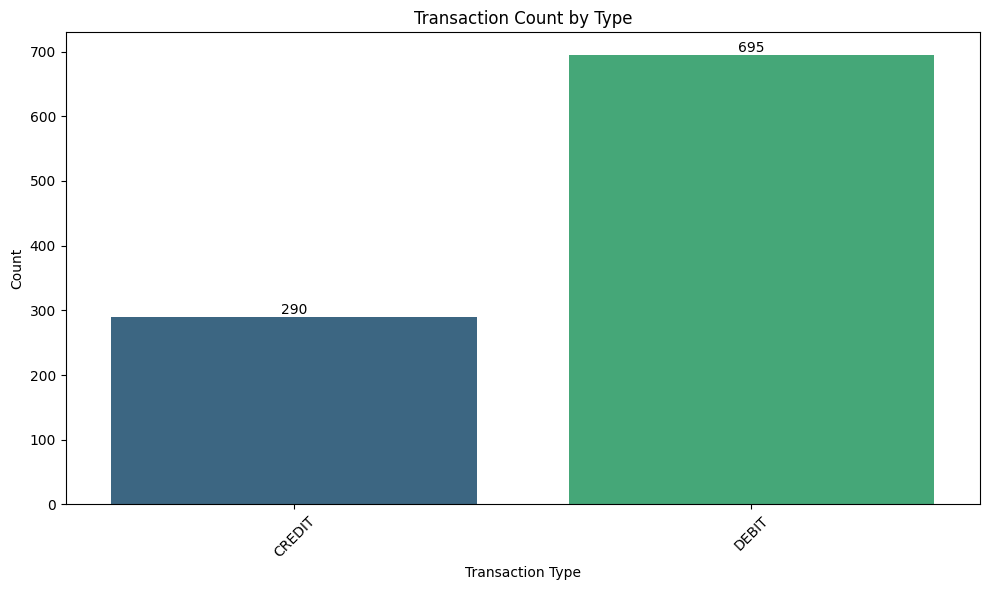

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='count', data=different_transaction_type, palette='viridis', hue='type', dodge=False)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Count by Type')
plt.xticks(rotation=45)

for index, row in different_transaction_type.iterrows():
    plt.text(index, row['count'] + 0.2, row['count'], ha='center', va='bottom')

plt.tight_layout()
plt.show()





 <div style="text-align: center; background-color: GREEN; padding: 5px; color: white; font-size: 30px;">
  <strong>BALANCE ANALYSIS</strong>
</div>




 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
Plotting the trend of account balances over time
</div>

 
 
 

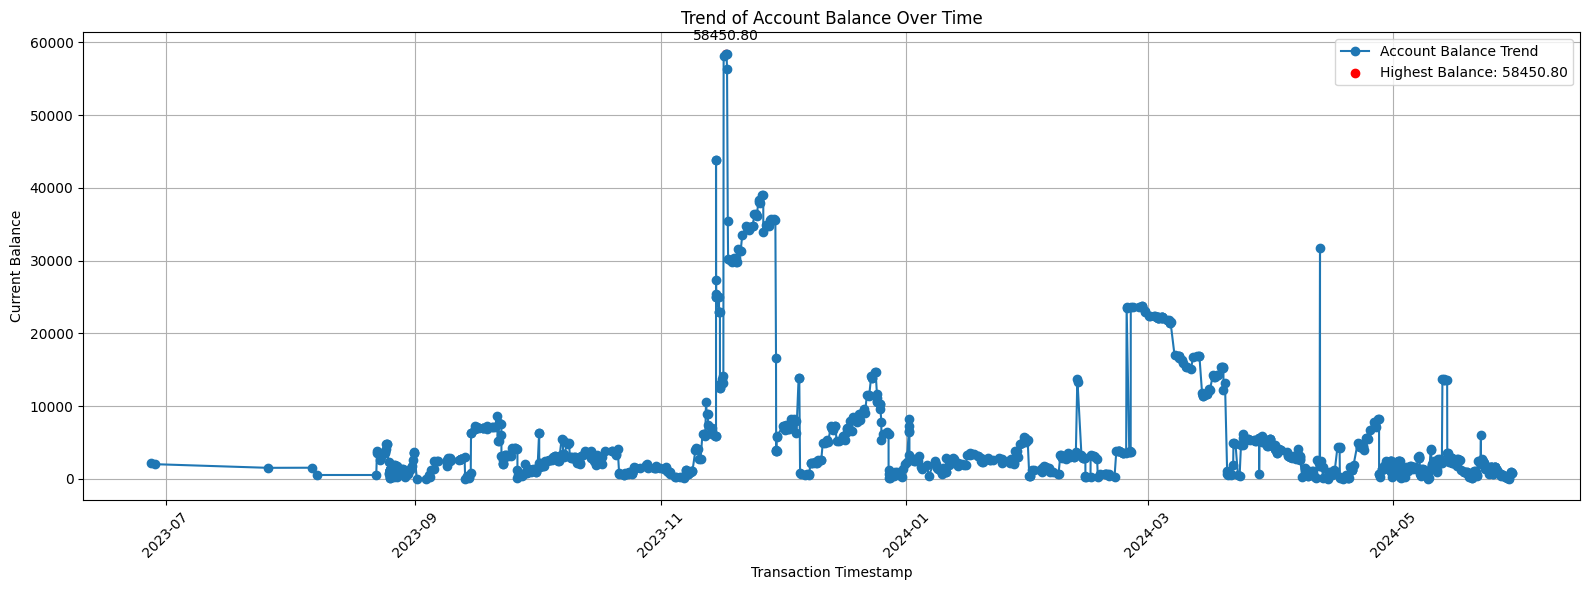

In [24]:

highest_balance_row = cleaned_df.loc[cleaned_df['currentBalance'].idxmax()]

plt.figure(figsize=(16, 6))
plt.plot('transactionTimestamp', 'currentBalance', data=cleaned_df, marker='o', label='Account Balance Trend')
plt.scatter(highest_balance_row['transactionTimestamp'], highest_balance_row['currentBalance'], color='red', label=f'Highest Balance: {highest_balance_row["currentBalance"]:.2f}')
plt.annotate(f'{highest_balance_row["currentBalance"]:.2f}', (highest_balance_row['transactionTimestamp'], highest_balance_row['currentBalance']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Trend of Account Balance Over Time')
plt.xlabel('Transaction Timestamp')
plt.ylabel('Current Balance')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()





 <div style="text-align: center; background-color: GREEN; padding: 5px; color: white; font-size: 30px;">
  <strong>SPENDING PATTERNS</strong>
</div>




  
 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?
</div>

 
 
 
  

In [25]:
narration_counts = (
    cleaned_df['narration']
    .value_counts()
    .to_frame()
    .rename(columns={'narration': 'count'})
)
narration_counts

,count
narration,
UPI Transaction,789
NEFT Transaction,159
Other,30
Interest Payment,4
ATM Withdrawal,3



  
 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
 Visualization of frequency of Narration categories
</div>

 
 
 
  
 

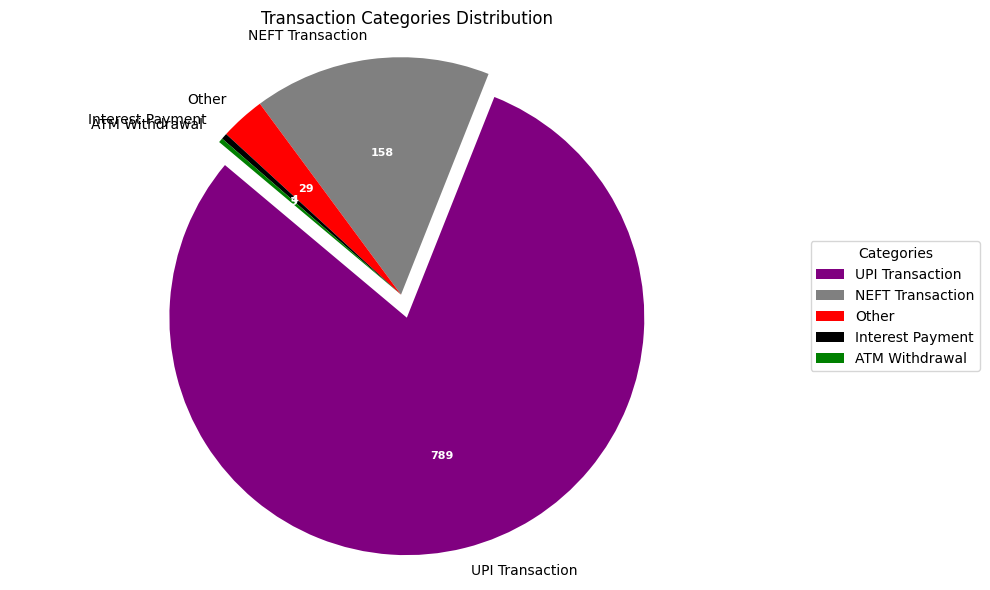

In [26]:
colors = ['purple', 'gray', 'red', 'black', 'green', 'pink']
explode = [0.1 if count == narration_counts['count'].max() else 0 for count in narration_counts['count']]

def absolute_value(val):
    total = sum(narration_counts['count'])
    return int(val * total / 100)

plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(narration_counts['count'], labels=narration_counts.index, autopct=lambda p: absolute_value(p), startangle=140, colors=colors, explode=explode)

plt.legend(wedges, narration_counts.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')

plt.title('Transaction Categories Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()


  
 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
  Analyze the frequency and amount of spending in each category.
</div>

 
 
 
  
 


In [27]:

(
    cleaned_df
    .groupby(['narration'])['amount']
    .sum()
    .to_frame()
)

,amount
narration,
ATM Withdrawal,13500.00
Interest Payment,135.00
NEFT Transaction,172430.51
Other,69502.00
UPI Transaction,587092.90



 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
 Visualization
</div>

 

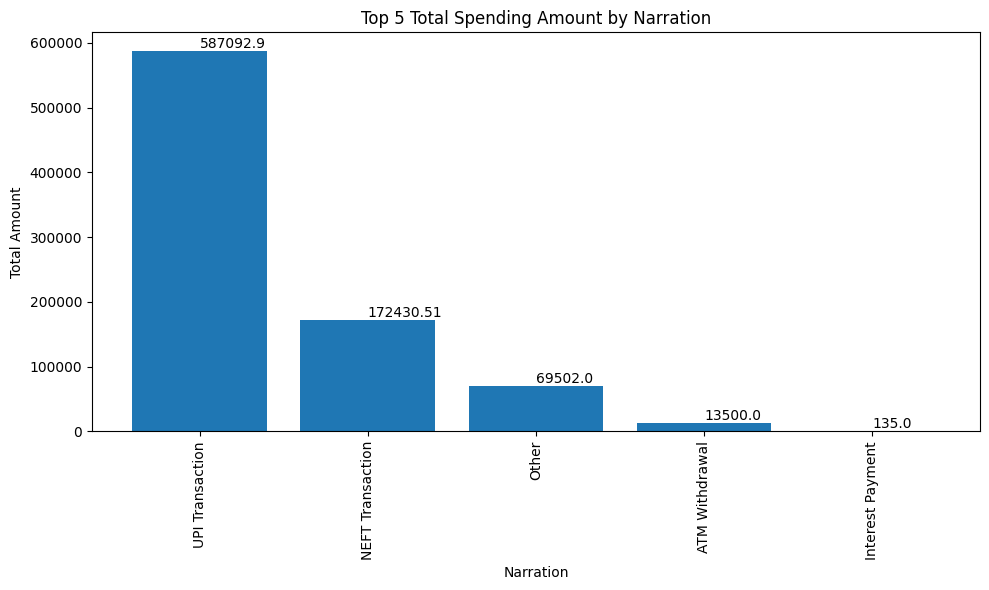

In [28]:
agg_df = cleaned_df.groupby('narration')['amount'].sum().reset_index()

top5_narrations = agg_df.sort_values(by='amount', ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_narrations['narration'], top5_narrations['amount'])
plt.xlabel('Narration')
plt.ylabel('Total Amount')
plt.title('Top 5 Total Spending Amount by Narration')
plt.xticks(rotation=90)  
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()





 <div style="text-align: center; background-color: GREEN; padding: 5px; color: white; font-size: 30px;">
  <strong>INCOME ANALYSIS</strong>
</div>




 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
  What are the main sources of income (e.g., salary, UPI credits)?
</div>

 


In [29]:
print("Main Source Of Income:\n ")

income_source = (
    cleaned_df
    .narration
    .value_counts()
)

income_source

Main Source Of Income:
 


narration
UPI Transaction     789
NEFT Transaction    159
Other                30
Interest Payment      4
ATM Withdrawal        3
Name: count, dtype: int64


 
 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
   Calculate frequency of each narration
</div>

 



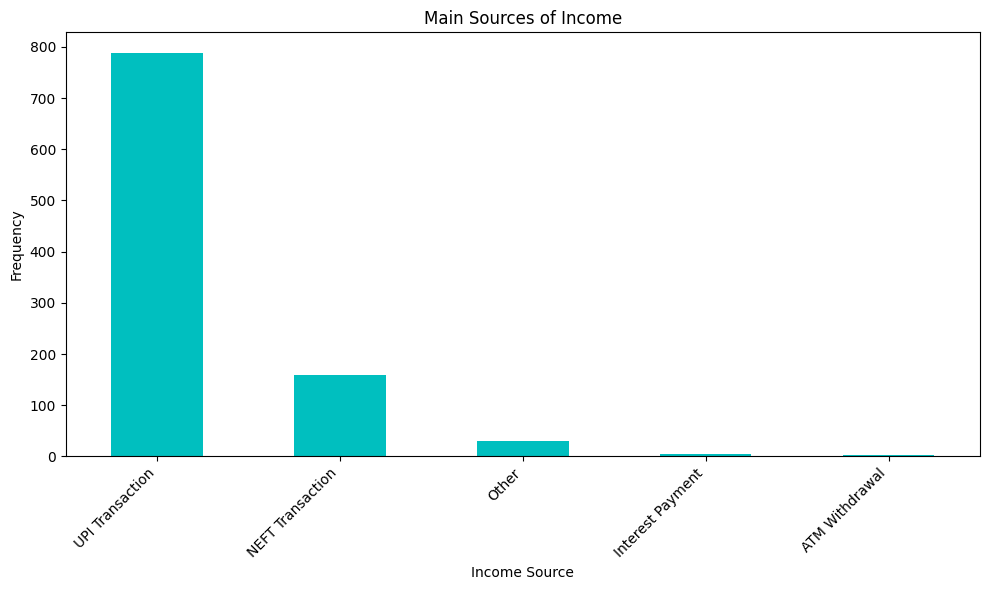

In [30]:
income_source = cleaned_df['narration'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))  # Creating a single subplot

income_source.plot(kind='bar', ax=ax, color='c')
ax.set_title('Main Sources of Income')
ax.set_xlabel('Income Source')
ax.set_ylabel('Frequency')
ax.set_xticklabels(income_source.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()



 
 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
   Identify any patterns in the timing and amount of income received.
</div>

 



In [31]:
credit_trans = cleaned_df[
    cleaned_df['type'] == 'CREDIT'
]
credit_trans

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,same_date,day,month,year,transactiontime
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,Interest Payment,NA,False,31,7,2023,11:10:38
6,CREDIT,UPI,3000.0,3524.80,2023-08-22 11:49:13+05:30,2023-08-22,S90667553,UPI Transaction,NA,True,22,8,2023,11:49:13
7,CREDIT,UPI,300.0,3824.80,2023-08-22 12:20:04+05:30,2023-08-22,S92051775,UPI Transaction,NA,True,22,8,2023,12:20:04
9,CREDIT,UPI,400.0,3024.80,2023-08-23 10:51:21+05:30,2023-08-23,S25232032,UPI Transaction,NA,True,23,8,2023,10:51:21
10,CREDIT,UPI,500.0,3524.80,2023-08-24 11:32:18+05:30,2023-08-24,S65206796,UPI Transaction,NA,True,24,8,2023,11:32:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,CREDIT,OTHERS,1000.0,1690.31,2024-05-25 22:54:11+05:30,2024-05-25,S85499451,Other,NA,True,25,5,2024,22:54:11
972,CREDIT,OTHERS,210.0,529.31,2024-05-28 05:41:08+05:30,2024-05-28,S84053875,NEFT Transaction,922020004688715,True,28,5,2024,05:41:08
975,CREDIT,OTHERS,150.0,419.31,2024-05-29 06:03:44+05:30,2024-05-29,S38920101,NEFT Transaction,922020004688715,True,29,5,2024,06:03:44
978,CREDIT,UPI,300.0,348.41,2024-05-29 17:10:42+05:30,2024-05-29,S66468359,UPI Transaction,NA,True,29,5,2024,17:10:42


In [32]:
inc_time = (
    credit_trans
    .groupby(['year','month'])['amount']
    .sum()
    .reset_index()
)

inc_time

,year,month,amount
0,2023,7,15.00
1,2023,8,12664.00
2,2023,9,22605.00
3,2023,10,21487.00
4,2023,11,115722.00
5,2023,12,37953.51
6,2024,1,22185.00
7,2024,2,63724.00
8,2024,3,25420.00
9,2024,4,58707.00


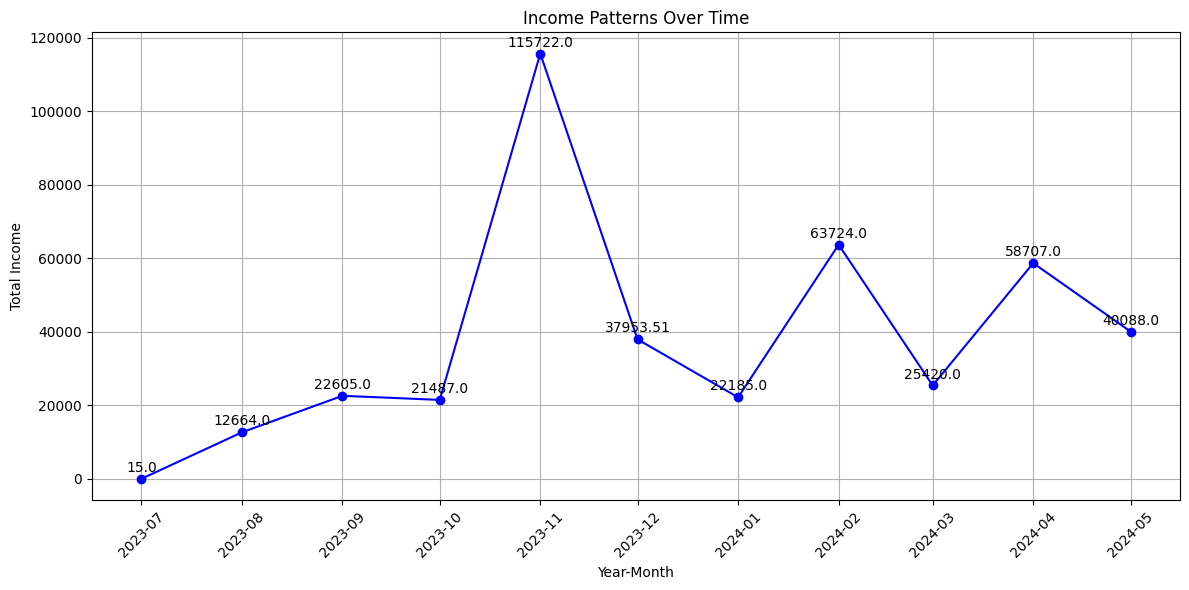

In [33]:
inc_time['date'] = pd.to_datetime(inc_time['year'].astype(str) + '-' + inc_time['month'].astype(str))

plt.figure(figsize=(12, 6))
plt.plot(inc_time['date'], inc_time['amount'], marker='o', linestyle='-', color='b')
plt.title('Income Patterns Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.grid(True)
for x, y in zip(inc_time['date'], inc_time['amount']):
    plt.annotate(f'{y}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center')
plt.tight_layout()
plt.show()




 <div style="text-align: center; background-color: GREEN; padding: 5px; color: white; font-size: 30px;">
  <strong>ALERT GENERATION</strong>
</div>





 
 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
  Identify any unusual or suspicious transactions.
</div>

 



In [39]:
low_balance_threshold = 500
low_balance_alerts = cleaned_df[cleaned_df['currentBalance'] < low_balance_threshold]
low_balance_alerts

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,same_date,day,month,year,transactiontime,datetime
26,DEBIT,UPI,1000.0,175.80,2023-08-25 16:56:59+05:30,2023-08-25,S18720196,UPI Transaction,NA,True,25,8,2023,16:56:59,2023-08-25 16:56:59
27,DEBIT,UPI,30.0,145.80,2023-08-25 18:23:59+05:30,2023-08-25,S22642750,UPI Transaction,NA,True,25,8,2023,18:23:59,2023-08-25 18:23:59
28,CREDIT,OTHERS,51.0,196.80,2023-08-25 18:37:02+05:30,2023-08-25,S23309045,Other,NA,True,25,8,2023,18:37:02,2023-08-25 18:37:02
29,DEBIT,UPI,1.0,195.80,2023-08-26 15:06:16+05:30,2023-08-26,S51405185,UPI Transaction,NA,True,26,8,2023,15:06:16,2023-08-26 15:06:16
36,DEBIT,UPI,1499.0,315.80,2023-08-27 12:19:54+05:30,2023-08-27,S80757332,UPI Transaction,NA,True,27,8,2023,12:19:54,2023-08-27 12:19:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,DEBIT,UPI,240.9,178.41,2024-05-29 08:53:10+05:30,2024-05-29,S43796126,UPI Transaction,NA,True,29,5,2024,08:53:10,2024-05-29 08:53:10
977,DEBIT,UPI,130.0,48.41,2024-05-29 12:01:51+05:30,2024-05-29,S53022278,UPI Transaction,NA,True,29,5,2024,12:01:51,2024-05-29 12:01:51
978,CREDIT,UPI,300.0,348.41,2024-05-29 17:10:42+05:30,2024-05-29,S66468359,UPI Transaction,NA,True,29,5,2024,17:10:42,2024-05-29 17:10:42
979,DEBIT,UPI,245.0,103.41,2024-05-29 17:12:19+05:30,2024-05-29,S66551053,UPI Transaction,NA,True,29,5,2024,17:12:19,2024-05-29 17:12:19


In [40]:
high_balance_threshold = 1000
high_balance_alerts = cleaned_df[cleaned_df['currentBalance'] < low_balance_threshold]
high_balance_alerts

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,same_date,day,month,year,transactiontime,datetime
26,DEBIT,UPI,1000.0,175.80,2023-08-25 16:56:59+05:30,2023-08-25,S18720196,UPI Transaction,NA,True,25,8,2023,16:56:59,2023-08-25 16:56:59
27,DEBIT,UPI,30.0,145.80,2023-08-25 18:23:59+05:30,2023-08-25,S22642750,UPI Transaction,NA,True,25,8,2023,18:23:59,2023-08-25 18:23:59
28,CREDIT,OTHERS,51.0,196.80,2023-08-25 18:37:02+05:30,2023-08-25,S23309045,Other,NA,True,25,8,2023,18:37:02,2023-08-25 18:37:02
29,DEBIT,UPI,1.0,195.80,2023-08-26 15:06:16+05:30,2023-08-26,S51405185,UPI Transaction,NA,True,26,8,2023,15:06:16,2023-08-26 15:06:16
36,DEBIT,UPI,1499.0,315.80,2023-08-27 12:19:54+05:30,2023-08-27,S80757332,UPI Transaction,NA,True,27,8,2023,12:19:54,2023-08-27 12:19:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,DEBIT,UPI,240.9,178.41,2024-05-29 08:53:10+05:30,2024-05-29,S43796126,UPI Transaction,NA,True,29,5,2024,08:53:10,2024-05-29 08:53:10
977,DEBIT,UPI,130.0,48.41,2024-05-29 12:01:51+05:30,2024-05-29,S53022278,UPI Transaction,NA,True,29,5,2024,12:01:51,2024-05-29 12:01:51
978,CREDIT,UPI,300.0,348.41,2024-05-29 17:10:42+05:30,2024-05-29,S66468359,UPI Transaction,NA,True,29,5,2024,17:10:42,2024-05-29 17:10:42
979,DEBIT,UPI,245.0,103.41,2024-05-29 17:12:19+05:30,2024-05-29,S66551053,UPI Transaction,NA,True,29,5,2024,17:12:19,2024-05-29 17:12:19


In [41]:
mean_amount = cleaned_df['amount'].mean()
std_amount = cleaned_df['amount'].std()
suspicious_limit = mean_amount + 2 * std_amount
suspicious_transactions = cleaned_df[cleaned_df['amount'] > suspicious_limit]
suspicious_transactions

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,same_date,day,month,year,transactiontime,datetime
275,CREDIT,UPI,37999.0,43892.80,2023-11-14 18:31:11+05:30,2023-11-14,S65593249,UPI Transaction,NA,True,14,11,2023,18:31:11,2023-11-14 18:31:11
277,DEBIT,UPI,16500.0,27391.80,2023-11-14 18:49:41+05:30,2023-11-14,S66498670,UPI Transaction,NA,True,14,11,2023,18:49:41,2023-11-14 18:49:41
285,DEBIT,UPI,10000.0,12970.80,2023-11-15 17:48:21+05:30,2023-11-15,S7201813,UPI Transaction,NA,True,15,11,2023,17:48:21,2023-11-15 17:48:21
291,CREDIT,CASH,45000.0,58180.80,2023-11-16 15:51:14+05:30,2023-11-16,00707977,Other,NA,True,16,11,2023,15:51:14,2023-11-16 15:51:14
295,DEBIT,UPI,21000.0,35400.80,2023-11-17 16:34:54+05:30,2023-11-17,S82212459,UPI Transaction,NA,True,17,11,2023,16:34:54,2023-11-17 16:34:54
332,DEBIT,UPI,19000.0,16625.80,2023-11-29 16:15:33+05:30,2023-11-29,S50294642,UPI Transaction,NA,True,29,11,2023,16:15:33,2023-11-29 16:15:33
333,DEBIT,UPI,12700.0,3925.80,2023-11-29 17:09:47+05:30,2023-11-29,S52850056,UPI Transaction,NA,True,29,11,2023,17:09:47,2023-11-29 17:09:47
351,CREDIT,OTHERS,7560.0,13925.80,2023-12-05 07:08:30+05:30,2023-12-05,S85798345,NEFT Transaction,922020004688715,True,5,12,2023,07:08:30,2023-12-05 07:08:30
353,DEBIT,UPI,13000.0,865.80,2023-12-05 15:50:06+05:30,2023-12-05,S8245037,UPI Transaction,NA,True,5,12,2023,15:50:06,2023-12-05 15:50:06
535,CREDIT,UPI,10000.0,13744.81,2024-02-12 13:22:57+05:30,2024-02-12,S97183279,UPI Transaction,NA,True,12,2,2024,13:22:57,2024-02-12 13:22:57




 
 <div style="text-align: left; background-color:black; padding: 5px; color: white; font-size: 18px; margin-top: 10px;">
    
  Identify any unusual or suspicious transactions.
</div>

 



KeyError: 'datetime'

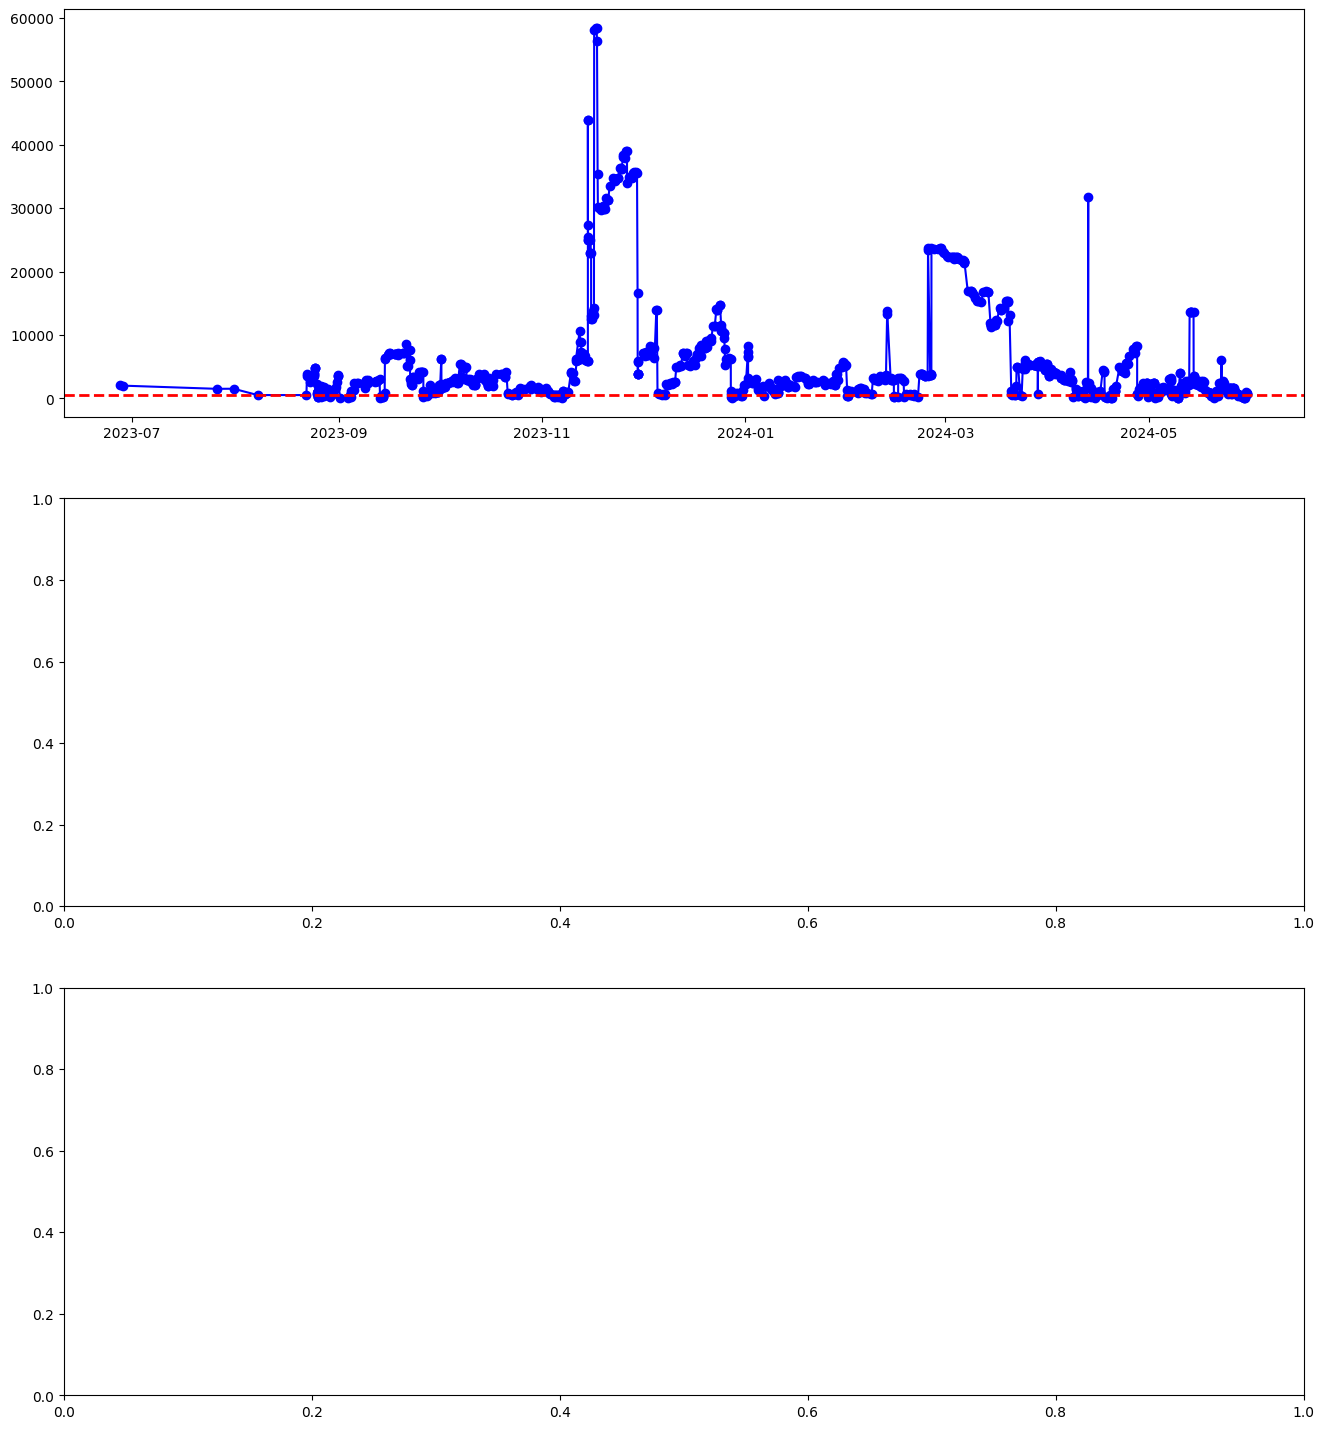

In [38]:
cleaned_df['datetime'] = pd.to_datetime(cleaned_df[['year', 'month', 'day']]) + pd.to_timedelta(cleaned_df['transactiontime'].astype(str))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 18))


ax1.plot(cleaned_df['datetime'], cleaned_df['currentBalance'], marker='o', linestyle='-', color='blue', label='Balance')
ax1.axhline(low_balance_threshold, color='red', linestyle='--', linewidth=2, label='Low Balance Threshold')
ax1.plot(low_balance_alerts['datetime'], low_balance_alerts['currentBalance'], 'ro', markersize=10, label='Low Balance Alert')
ax1.set_title('Low Balance Alerts')
ax1.set_xlabel('Transaction Timestamp')
ax1.set_ylabel('Current Balance')
ax1.legend()

ax2.plot(cleaned_df['datetime'], cleaned_df['amount'], 'o', label='Transactions')
ax2.plot(high_balance_alerts['datetime'], high_balance_alerts['amount'], 'ro', markersize=10, label='High_Balance_Alerts')
ax2.axhline(high_balance_threshold , color='orange', linestyle='--', linewidth=2, label='High_Balance_Threshold ')
ax2.set_title('High_Balance_Alerts')
ax2.set_xlabel('Transaction Timestamp')
ax2.set_ylabel('Transaction Amount')
ax2.legend()

ax3.plot(cleaned_df['datetime'],cleaned_df['amount'], 'o', label='Transactions')
ax3.plot(suspicious_transactions['datetime'], suspicious_transactions['amount'], 'ro', markersize=10, label='Suspicious Transactions')
ax3.axhline(mean_amount, color='red', linestyle='--', linewidth=2, label='Mean')
ax3.axhline(suspicious_limit, color='orange', linestyle='--', linewidth=2, label='Suspicious Limit')
ax3.set_title('Suspicious Transactions Highlight')
ax3.set_xlabel('Transaction Timestamp')
ax3.set_ylabel('Transaction Amount')
ax3.legend()

plt.tight_layout()
plt.show()